<h1 style="text-align:center; font-size:24px;">Name:Rohan Nachane</h1>

<h2 style="text-align:center; font-size:25px; color:blue;"><b>Practical 06-Decision Tree Classifier Algorithm</b></h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("tennis.csv")

In [4]:
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [5]:
df = pd.get_dummies(df, columns=['outlook', 'temp', 'humidity'])

In [6]:
df

,windy,play,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal
0,False,no,False,False,True,False,True,False,True,False
1,True,no,False,False,True,False,True,False,True,False
2,False,yes,True,False,False,False,True,False,True,False
3,False,yes,False,True,False,False,False,True,True,False
4,False,yes,False,True,False,True,False,False,False,True
5,True,no,False,True,False,True,False,False,False,True
6,True,yes,True,False,False,True,False,False,False,True
7,False,no,False,False,True,False,False,True,True,False
8,False,yes,False,False,True,True,False,False,False,True
9,False,yes,False,True,False,False,False,True,False,True


In [7]:
x = df.drop('play', axis=1)
y = df['play']

In [8]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt_classifier = DecisionTreeClassifier()

In [13]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [14]:
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='accuracy')

In [16]:
grid_search_dt.fit(x_train, y_train)

C:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [17]:
print("Best Parameters:", grid_search_dt.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [18]:
best_dt_classifier = grid_search_dt.best_estimator_

In [19]:
best_dt_classifier

DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=5)

In [21]:
cv_scores_dt = cross_val_score(best_dt_classifier, x_train, y_train, cv=5)

C:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [25]:
from sklearn.model_selection import KFold

In [26]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [28]:
cv_scores_dt = cross_val_score(best_dt_classifier, x_train, y_train, cv=kf)


In [29]:
print("Cross Validation Scores:", cv_scores_dt)
print("Mean CV Score:", cv_scores_dt.mean())

Cross Validation Scores: [0.33333333 0.5        0.5        0.5        0.5       ]
Mean CV Score: 0.4666666666666666


In [30]:
y_pred_dt = best_dt_classifier.predict(x_test)

In [31]:
y_pred_dt

array(['yes', 'no', 'no'], dtype=object)

In [32]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
print(comparison_df)

   Actual Predicted
9     yes       yes
11    yes        no
0      no        no


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

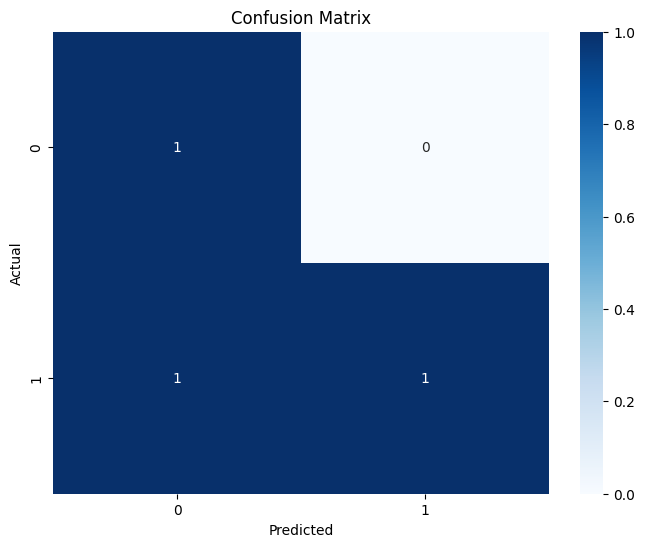

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, pos_label='yes')
recall_dt = recall_score(y_test, y_pred_dt, pos_label='yes')
f1_dt = f1_score(y_test, y_pred_dt, pos_label='yes')

In [37]:
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

Accuracy: 0.6666666666666666
Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666
